<a href="https://colab.research.google.com/github/RaoulNoumbissi/Hello-World/blob/master/Google_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import the necessary libraries
import pandas as pd
import datetime
import pandas_datareader.data as web
import numpy as np 
from pandas import Series, DataFrame
from sklearn import model_selection
from sklearn import preprocessing




In [13]:
# import  Alphabet Inc. (GOOGL) stock from yahoo finance
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2018, 1, 11)

df = web.DataReader("GOOGL", 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,535.799988,527.880005,532.599976,529.549988,1324000,529.549988
2015-01-05,527.989990,517.750000,527.150024,519.460022,2059100,519.460022
2015-01-06,521.210022,505.549988,520.500000,506.640015,2722800,506.640015
2015-01-07,511.489990,503.649994,510.950012,505.149994,2345900,505.149994
2015-01-08,507.500000,495.019989,501.510010,506.910004,3652700,506.910004


In [24]:
#feature engineering
dfreg=df.loc[:,['Adj Close','Volume']]
dfreg['HL_PT']= (df['High']-df['Low'])/df['Close']*100
dfreg['PCT_Change']= (df['Close']-df['Open'])/df['Open']*100
print(dfreg.head())
print("matrix length:",len(dfreg))

             Adj Close   Volume     HL_PT  PCT_Change
Date                                                 
2015-01-02  529.549988  1324000  1.495606   -0.572660
2015-01-05  519.460022  2059100  1.971276   -1.458788
2015-01-06  506.640015  2722800  3.090959   -2.662821
2015-01-07  505.149994  2345900  1.552014   -1.135144
2015-01-08  506.910004  3652700  2.461978    1.076747
matrix length: 763


In [0]:
#data preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)
# We want to separate 1 percent of the data to forecast
forecast_out = int(np.math.ceil(0.01 * len(dfreg)))
# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))
# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)
# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

#splitting the data into training and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)


In [0]:
#importing libraries for regression model

from sklearn.linear_model import LinearRegression
from sklearn import neighbors

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

The simple linear regression confidence is 0.9547190614360661
The simple linear regression forcast for [[ 1.95567886 -0.32520969  0.64424943  1.85278902]
 [ 2.0767925  -0.34764665  0.57055389  1.58256842]
 [ 2.10483833 -0.61138103 -0.82258568 -0.11858144]
 [ 2.2009486  -0.40113474 -0.62814098  0.59809903]
 [ 2.2268773  -0.68189718 -0.90997604  0.27805091]
 [ 2.21748509 -0.57351867 -0.79423065 -0.48986017]
 [ 2.19995625 -0.87771971 -0.9446802   0.27295021]
 [ 2.21259036 -0.7930803  -0.99191556 -0.02395649]],  is [1077.22754415 1095.62220124 1099.1186584  1111.86949951 1116.90994453
 1116.38775732 1113.92469101 1115.5909987 ]


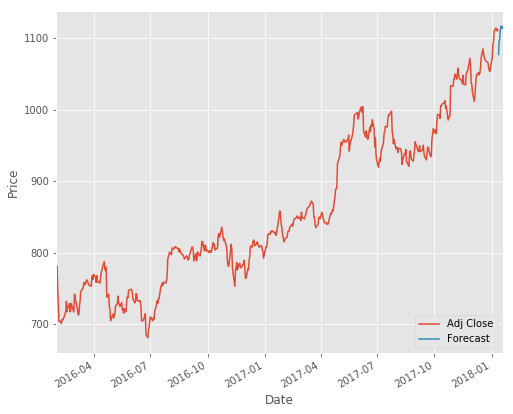

In [17]:
#predicting with simple linear regression

# fitting the mode to the training data
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

#Evaluating the model with simple linear regression
confidencereg = clfreg.score(X_test, y_test)
print("The simple linear regression confidence is {0}".format(confidencereg))

#prediction with simple linear regression
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast']=np.nan
print("The simple linear regression forcast for {0},  is {1}".format(X_lately,forecast_set))

#visualizing the model with simple linear regression
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Adjusting the size of matplot lib
import matplotlib as mpl
mpl.rc('figure',figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib
style.use('ggplot')


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


The quadratic regression 2 confidence is 0.9549550385712787
The quadratic regression 2 forcast for [[ 1.95567886 -0.32520969  0.64424943  1.85278902]
 [ 2.0767925  -0.34764665  0.57055389  1.58256842]
 [ 2.10483833 -0.61138103 -0.82258568 -0.11858144]
 [ 2.2009486  -0.40113474 -0.62814098  0.59809903]
 [ 2.2268773  -0.68189718 -0.90997604  0.27805091]
 [ 2.21748509 -0.57351867 -0.79423065 -0.48986017]
 [ 2.19995625 -0.87771971 -0.9446802   0.27295021]
 [ 2.21259036 -0.7930803  -0.99191556 -0.02395649]],  is [1083.43051552 1102.16019131 1103.57444747 1114.93258021 1120.64834478
 1122.99493828 1117.98664055 1120.37673619]


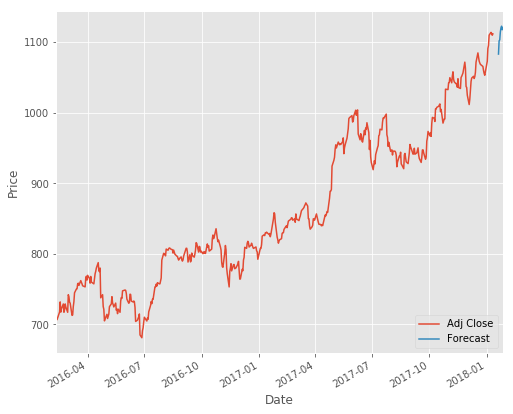

In [18]:
#predicting with QDA power 2 regression

# fitting the model to the training data
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)


#Evaluating the model with QDA power 2 regression
confidencepoly2 = clfpoly2.score(X_test,y_test)
print("The quadratic regression 2 confidence is {0}".format(confidencepoly2))

#prediction with QDA power 2 regression
forecast_set =clfpoly2.predict(X_lately)
dfreg['Forecast']=np.nan
print("The quadratic regression 2 forcast for {0},  is {1}".format(X_lately,forecast_set))

#visualizing the model with QDA power 2 regression
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Adjusting the size of matplot lib
import matplotlib as mpl
mpl.rc('figure',figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib
style.use('ggplot')


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

The knn regression confidence is 0.916149799401702
The knn regression forcast for [[ 1.95567886 -0.32520969  0.64424943  1.85278902]
 [ 2.0767925  -0.34764665  0.57055389  1.58256842]
 [ 2.10483833 -0.61138103 -0.82258568 -0.11858144]
 [ 2.2009486  -0.40113474 -0.62814098  0.59809903]
 [ 2.2268773  -0.68189718 -0.90997604  0.27805091]
 [ 2.21748509 -0.57351867 -0.79423065 -0.48986017]
 [ 2.19995625 -0.87771971 -0.9446802   0.27295021]
 [ 2.21259036 -0.7930803  -0.99191556 -0.02395649]],  is [1035.31497192 1064.82995605 1073.38500977 1058.09503174 1044.61999512
 1093.         1048.00500488 1073.46496582]


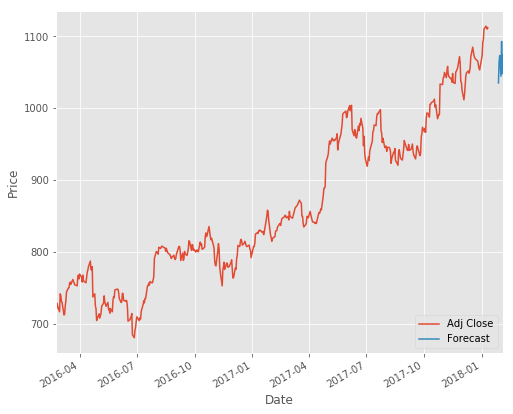

In [19]:
#predicting with  KNN Regression

# fitting the model to the training data

clfknn = neighbors.KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

#Evaluating the model with QDA power 2 regression
confidenceknn = clfknn.score(X_test, y_test)
print("The knn regression confidence is {0}".format(confidenceknn))

#prediction with KNN Regression
forecast_set =clfknn.predict(X_lately)
dfreg['Forecast']=np.nan
print("The knn regression forcast for {0},  is {1}".format(X_lately,forecast_set))

#visualizing the model with KNN Regression
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

#Adjusting the size of matplot lib
import matplotlib as mpl
mpl.rc('figure',figsize=(8,7))
mpl.__version__

#adjusting the style of matplotlib
style.use('ggplot')


last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()